In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Data_Mining_ Individual_Project/Kickstarter.xlsx'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [4]:
kickstarter_df = pd.read_excel(path)

In [5]:
len(kickstarter_df)

15474

In [6]:
kickstarter_df['category'].value_counts()

Hardware        2709
Web             2577
Software        2149
Gadgets         1546
Plays            880
Apps             742
Wearables        629
Musical          595
Robots           363
Festivals        346
Sound            330
Flight           297
Experimental     244
Immersive        210
Makerspaces      147
Spaces           125
Places            84
Shorts            38
Webseries         18
Academic          15
Restaurants       15
Thrillers         13
Blues             10
Name: category, dtype: int64

In [7]:
#kickstarter_df['category'].replace(['Robots','Festivals','Sound''Flight','Experimental','Immersive','Makerspaces','Spaces','Places','Shorts','Webseries','Academic','Restaurants','Thrillers','Blues'], 'Other',inplace = True)


In [8]:
kickstarter_df['country'].value_counts()

US    11000
GB     1924
CA      830
AU      532
NL      240
DE      181
FR      161
IT      102
DK       89
NZ       86
ES       72
SE       68
IE       52
NO       47
CH       41
BE       24
AT       24
LU        1
Name: country, dtype: int64

In [9]:
kickstarter_df['country'].replace(['NL','DE','FR','IT','DK','NZ','ES','SE','IE','NO','CH','BE','AT','LU'], 'Other',inplace = True)

In [10]:
kickstarter_df['currency'].value_counts()

USD    11000
GBP     1924
EUR      857
CAD      830
AUD      532
DKK       89
NZD       86
SEK       68
NOK       47
CHF       41
Name: currency, dtype: int64

In [11]:
kickstarter_df['currency'].replace(['DKK','NZD','SEK','NOK','CHF'], 'Other',inplace = True)

In [13]:
kickstarter_df = kickstarter_df.dropna()

In [14]:
#Dropping all  the observations other than success failed in project state 
kickstarter_df.drop(kickstarter_df[kickstarter_df['state']== 'canceled'].index, inplace = True)
kickstarter_df.drop(kickstarter_df[kickstarter_df['state']== 'live'].index, inplace = True)
kickstarter_df.drop(kickstarter_df[kickstarter_df['state']== 'suspended'].index, inplace = True)

In [ ]:
correlation_matrix = kickstarter_df.corr()

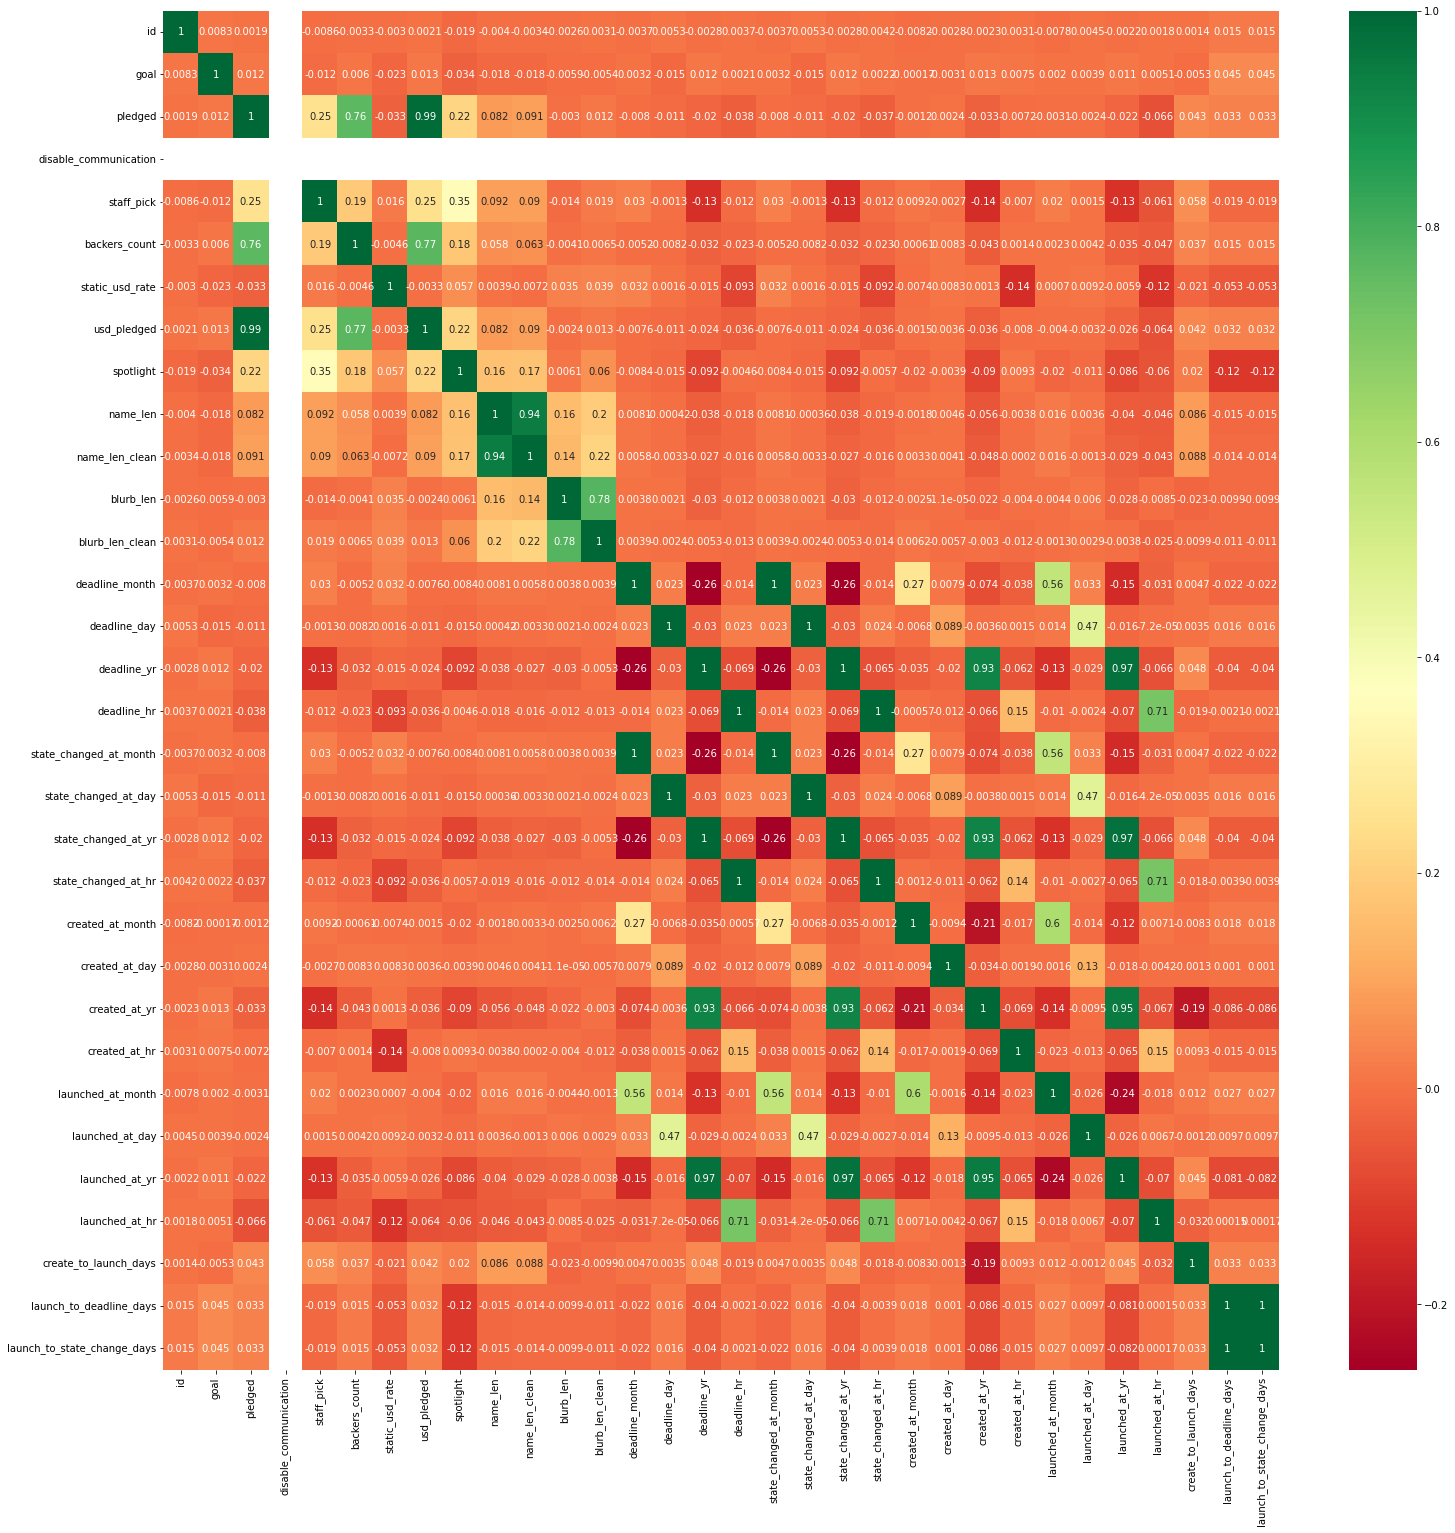

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = kickstarter_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(kickstarter_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
kickstarter_df['goal_usd'] = round(kickstarter_df['goal']*kickstarter_df['static_usd_rate'],3)

In [16]:
kickstarter_df['goal_to_launch_time_ratio'] = round(kickstarter_df['goal_usd']/kickstarter_df['launch_to_deadline_days'],3)

In [17]:
kickstarter_df['goal_to_create_time_ratio'] = round(kickstarter_df['goal_usd']/(kickstarter_df['create_to_launch_days']+1),3)

In [18]:
kickstarter_df['create_to_deadline'] = kickstarter_df['create_to_launch_days']+ kickstarter_df['launch_to_deadline_days']

In [19]:
X = kickstarter_df[['goal','disable_communication','country', 'currency', 'static_usd_rate', 'category','name_len', 'name_len_clean','blurb_len', 'blurb_len_clean', 'deadline_weekday','created_at_weekday', 
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'created_at_month', 'created_at_day','created_at_yr', 'created_at_hr','goal_usd','goal_to_launch_time_ratio','goal_to_create_time_ratio','create_to_launch_days','create_to_deadline','launch_to_deadline_days'
        ]]
y = kickstarter_df["state"]

In [20]:
X = pd.get_dummies(X, columns = ['disable_communication','country','currency','category','deadline_weekday','created_at_weekday','deadline_month', 'deadline_day','deadline_hr','created_at_month', 'created_at_day'],drop_first = True)

In [21]:
# Standardize predictors
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
X_std=pd.DataFrame(X_std, columns=X.columns)

<h3> Feature Selection</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
model = rf.fit(X_std, y)

In [ ]:
tree_indices = np.arange(0, len(rf.feature_importances_)) + 0.5

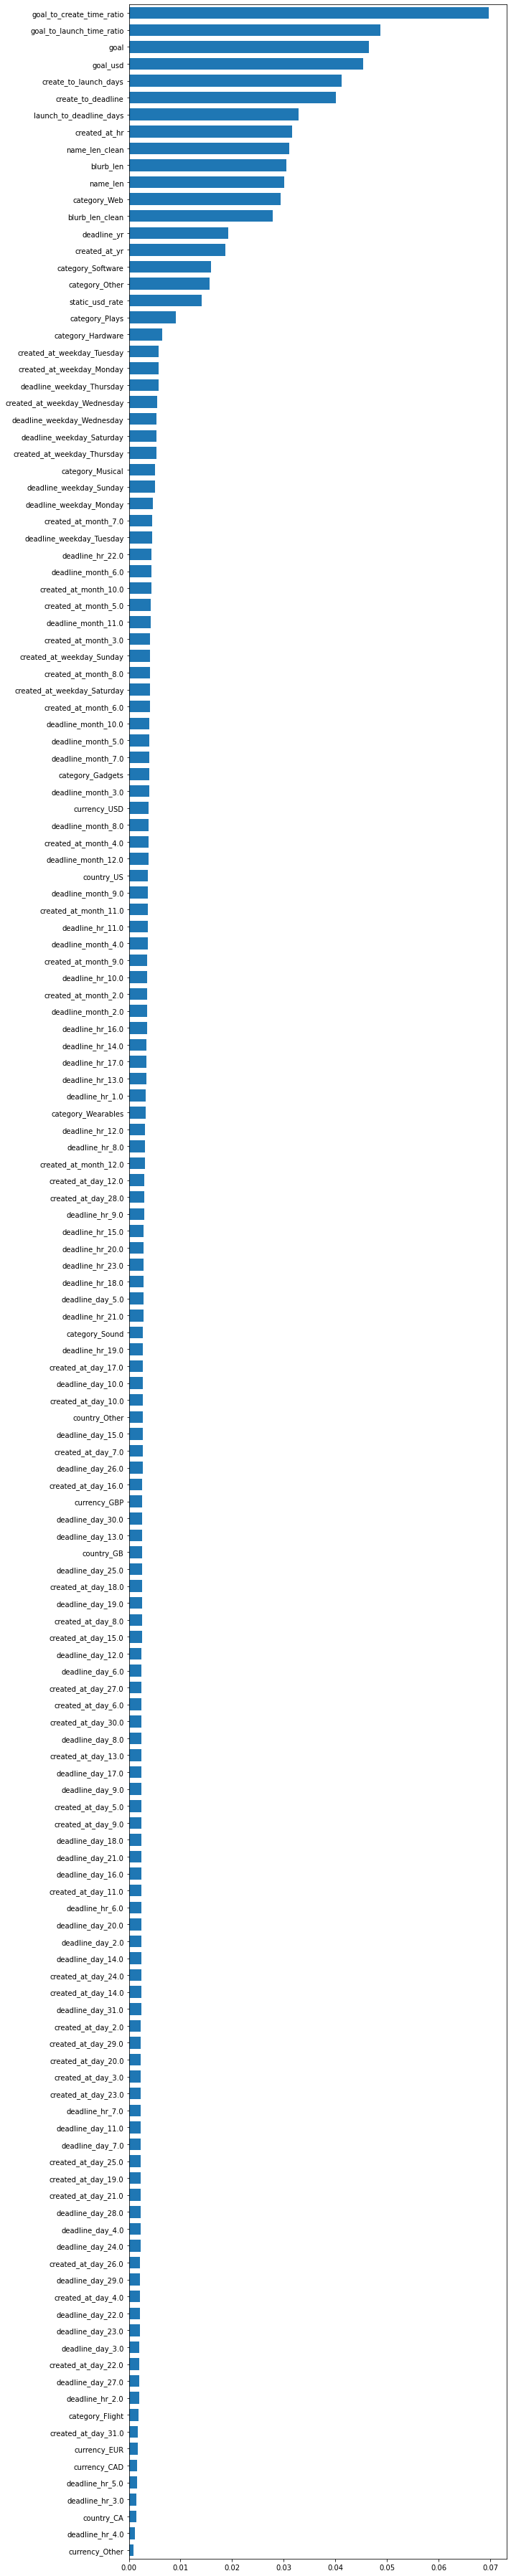

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_std, y, n_repeats=1,
                                random_state=0)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(rf.feature_importances_)
tree_indices = np.arange(0, len(rf.feature_importances_)) + 0.5

fig, (ax1) = plt.subplots(1, 1, figsize=(10,50))
ax1.barh(tree_indices,
         rf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_std.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(rf.feature_importances_)))

fig.tight_layout()
plt.show()

Removing the features that are  not very important

In [22]:
X = kickstarter_df[['goal','disable_communication','country', 'currency', 'static_usd_rate', 'category','name_len', 'name_len_clean','blurb_len', 'blurb_len_clean', 
       'deadline_month',  'deadline_yr','created_at_month', 'created_at_yr', 'goal_usd','goal_to_launch_time_ratio','goal_to_create_time_ratio','create_to_launch_days','create_to_deadline','launch_to_deadline_days'
        ]]
X = pd.get_dummies(X, columns = ['disable_communication','country','currency','category','deadline_month', 'created_at_month'],drop_first = True)
y = kickstarter_df["state"]

In [23]:
# Standardize predictors
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
X_std=pd.DataFrame(X_std, columns=X.columns)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.33, random_state = 5)

<h3> Logistic Regression </h3>

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
model = lr.fit(X_train,y_train)

In [26]:
y_test_pred = model.predict(X_test)

In [27]:
metrics.accuracy_score(y_test, y_test_pred)

0.718407960199005

In [ ]:
metrics.confusion_matrix(y_test, y_test_pred)


array([[2499,  422],
       [ 902,  611]])

<h3> K nearest Neighbors</h3>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
lr=[]
print("i","\t","accuracy")
for i in range (1,50):
    knn3 = KNeighborsClassifier(n_neighbors=i)
    model3 = knn3.fit(X_train,y_train)
    y_test_pred = model3.predict(X_test)
    print(i,"\t",accuracy_score(y_test, y_test_pred))
    lr.append(accuracy_score(y_test, y_test_pred))

i 	 accuracy
1 	 0.6087054578258908
2 	 0.6427604871447903
3 	 0.6233649075327018
4 	 0.6497519170049617
5 	 0.6400541271989174
6 	 0.6574199368516013
7 	 0.6481732070365359
8 	 0.6589986468200271
9 	 0.6571944068561119
10 	 0.6641858367162833
11 	 0.6596752368064953
12 	 0.6691474966170501
13 	 0.6632837167343256
14 	 0.6693730266125395
15 	 0.6684709066305818
16 	 0.6720793865584123
17 	 0.6671177266576455
18 	 0.6693730266125395
19 	 0.6659900766801985
20 	 0.6675687866486243
21 	 0.6689219666215607
22 	 0.6700496165990076
23 	 0.6705006765899865
24 	 0.671402796571944
25 	 0.6705006765899865
26 	 0.6718538565629228
27 	 0.6745602165087957
28 	 0.6716283265674334
29 	 0.6734325665313486
30 	 0.6711772665764547
31 	 0.6720793865584123
32 	 0.6707262065854759
33 	 0.6707262065854759
34 	 0.6682453766350924
35 	 0.6709517365809653
36 	 0.6716283265674334
37 	 0.6709517365809653
38 	 0.6698240866035182
39 	 0.6716283265674334
40 	 0.6723049165539017
41 	 0.6743346865133063
42 	 0.672530

Visualising the impact of the number of neighbors on the accuracy of the prediction

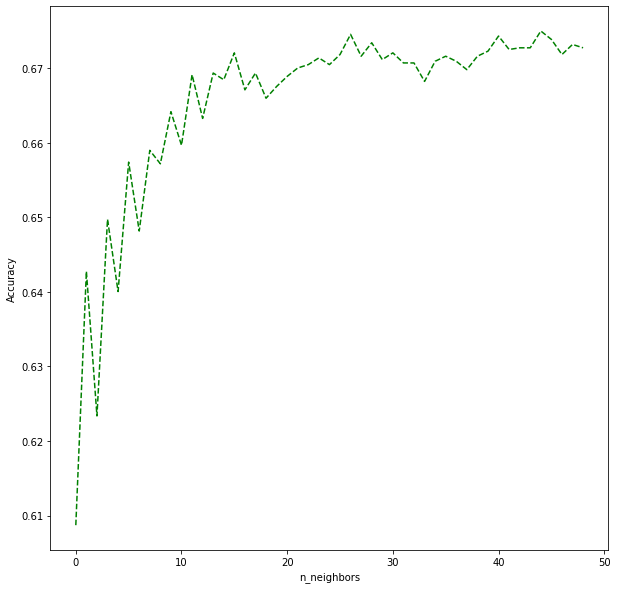

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(lr, 'g--')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

<h3>  Decision Trees</h3>

Since Tree based algorithms  can capture  high variance, we do not need to bucket the less occuring categories into "Others column

In [ ]:
# K-fold cross validation for trees with different depths
from sklearn.tree import DecisionTreeClassifier
lr=[]
from sklearn.model_selection import cross_val_score
for i in range (2,25):                                                 
    model2 = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=model2, X=X, y=y, cv=5)
    print(i,':',np.average(scores))
    lr.append(np.average(scores))

2 : 0.6310023912048885
3 : 0.6665919940498376
4 : 0.707531561050268
5 : 0.6947258538602206
6 : 0.696736804797152
7 : 0.6918969495718749
8 : 0.6762654417549432
9 : 0.6645031467524756
10 : 0.6563147179228968
11 : 0.6563895106218658
12 : 0.6505833636540737
13 : 0.6438091791341949
14 : 0.638971235986068
15 : 0.6368128611297161
16 : 0.6268378594601125
17 : 0.6281779761411567
18 : 0.6222231859583705
19 : 0.6182778503043113
20 : 0.6197672475593998
21 : 0.6194687972563633
22 : 0.6165662364308336
23 : 0.6162680355291645
24 : 0.615151631874714


Visualising the impact of the maximum depth of the tree on the  decision tree model accuracy

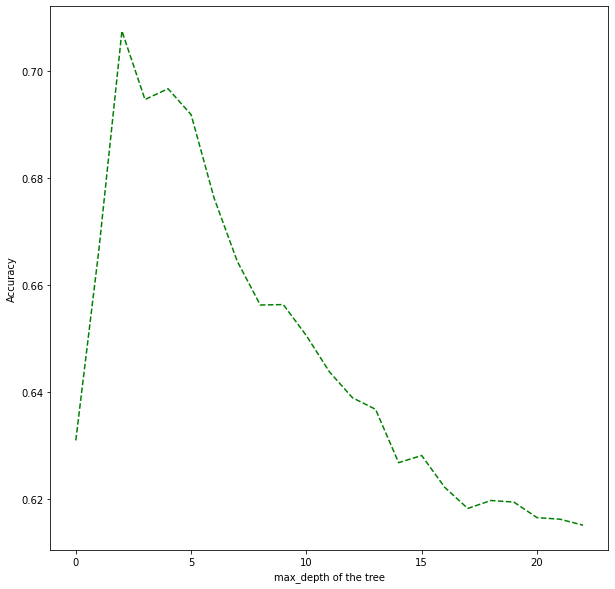

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(lr, 'g--')
plt.xlabel("max_depth of the tree")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(max_depth=5)  
model = decisiontree.fit(X_train, y_train)

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_test_pred)

0.7101939557961209

<h3> Random Forests </h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# K-fold cross validation for different numbers of features to consider at each split
lr_final=[]
print('n_estimators','\t','max_features','\t','accuracy')
for n_estimators in [50,100,150,200,250,300,500]:
  lr=[]
  for i in range (2,40,3):                                                                   
      model2 = RandomForestClassifier(random_state=0,max_features=i,max_depth=5,n_estimators=n_estimators)
      scores = cross_val_score(estimator=model2, X=X, y=y, cv=5)
      print(n_estimators,'\t\t',i,'\t\t',round(np.average(scores),3))
      lr.append(np.average(scores))  
  lr_final.append(lr)  

n_estimators 	 max_features 	 accuracy
50 		 2 		 0.662
50 		 5 		 0.688
50 		 8 		 0.703
50 		 11 		 0.706
50 		 14 		 0.711
50 		 17 		 0.709
50 		 20 		 0.713
50 		 23 		 0.711
50 		 26 		 0.711
50 		 29 		 0.714
50 		 32 		 0.708
50 		 35 		 0.709
50 		 38 		 0.708
100 		 2 		 0.663
100 		 5 		 0.688
100 		 8 		 0.706
100 		 11 		 0.705
100 		 14 		 0.71
100 		 17 		 0.711
100 		 20 		 0.713
100 		 23 		 0.711
100 		 26 		 0.711
100 		 29 		 0.712
100 		 32 		 0.709
100 		 35 		 0.708
100 		 38 		 0.708
150 		 2 		 0.664
150 		 5 		 0.69
150 		 8 		 0.704
150 		 11 		 0.705
150 		 14 		 0.71
150 		 17 		 0.712
150 		 20 		 0.712
150 		 23 		 0.711
150 		 26 		 0.71
150 		 29 		 0.711
150 		 32 		 0.709
150 		 35 		 0.709
150 		 38 		 0.709
200 		 2 		 0.664
200 		 5 		 0.691
200 		 8 		 0.705
200 		 11 		 0.706
200 		 14 		 0.71
200 		 17 		 0.709
200 		 20 		 0.71
200 		 23 		 0.711
200 		 26 		 0.71
200 		 29 		 0.71
200 		 32 		 0.708
200 		 35 		 0.708
200 		 38 		 0.708
250 		

Visualising the impact of n_estimators and max_features on the accuracy of the  Random Forest model

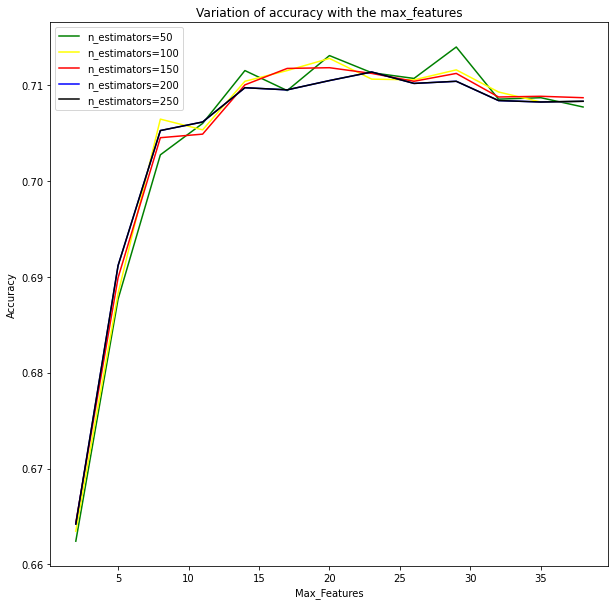

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([i for i in range(2,40,3)],lr_final[0],color='green', label="n_estimators=50")
plt.plot([i for i in range(2,40,3)],lr_final[1],color='yellow', label="n_estimators=100")
plt.plot([i for i in range(2,40,3)],lr_final[2],color='red', label="n_estimators=150")
plt.plot([i for i in range(2,40,3)],lr_final[3],color='blue', label="n_estimators=200")
plt.plot([i for i in range(2,40,3)],lr_final[3],color='black', label="n_estimators=250")
plt.xlabel("Max_Features")
plt.ylabel("Accuracy")
plt.title("Variation of accuracy with the max_features")


plt.legend()
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=3,max_features=50,max_depth=5,n_estimators=29)
model_rf = randomforest.fit(X_train, y_train)

In [35]:
# Make prediction and evaluate accuracy
y_test_pred = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_test_pred)

In [36]:
accuracy_rf

0.7330845771144279

<h3> Gradient Boosting </h3>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

print("n_estimator \t\t learning_rate \t\t accuracy")
lr_final=[]
for n_estimators in [50,100,150,200]:
  lr=[]
  for learning_rate in [0.01,0.05,0.1,0.25,0.5]:
    clf_gradient_boosting = GradientBoostingClassifier(random_state=5,n_estimators=n_estimators,learning_rate=learning_rate,max_depth = 22, min_samples_split=800,min_samples_leaf =800)
    model_gradient_boosting = clf_gradient_boosting.fit(X_train,y_train)
    y_test_pred_boosting = model_gradient_boosting.predict(X_test)   
    accuracy = accuracy_score(y_test, y_test_pred_boosting)    
    lr.append(accuracy) 
    print(str(n_estimators)+"\t\t\t "+str(round(learning_rate,3))+"\t\t\t "+str(round(accuracy,3)))
  lr_final.append(lr)

n_estimator 		 learning_rate 		 accuracy
50			 0.01			 0.675
50			 0.05			 0.735
50			 0.1			 0.739
50			 0.25			 0.741
50			 0.5			 0.739
100			 0.01			 0.708
100			 0.05			 0.739
100			 0.1			 0.742
100			 0.25			 0.741
100			 0.5			 0.737
150			 0.01			 0.729
150			 0.05			 0.74
150			 0.1			 0.743
150			 0.25			 0.74
150			 0.5			 0.732
200			 0.01			 0.732
200			 0.05			 0.745
200			 0.1			 0.743
200			 0.25			 0.738
200			 0.5			 0.73


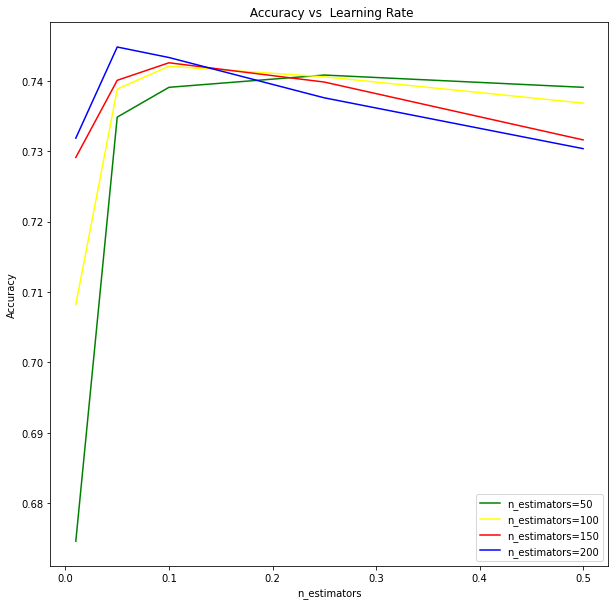

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[0],color='green', label="n_estimators=50")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[1],color='yellow', label="n_estimators=100")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[2],color='red', label="n_estimators=150")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[3],color='blue', label="n_estimators=200")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title(" Accuracy vs  Learning Rate")
plt.legend()
plt.show()

In [ ]:
print("n_estimator \t\t learning_rate \t\t accuracy")
lr_final=[]
for n_estimators in [250,500,750,1000]:
  lr=[]
  for learning_rate in [0.01,0.025,0.05,0.1,0.25]:
    clf_gradient_boosting = GradientBoostingClassifier(random_state=5,n_estimators=n_estimators,learning_rate=learning_rate,max_depth = 22, min_samples_split=800,min_samples_leaf =800)
    model_gradient_boosting = clf_gradient_boosting.fit(X_train,y_train)
    y_test_pred_boosting = model_gradient_boosting.predict(X_test)   
    accuracy = accuracy_score(y_test, y_test_pred_boosting)    
    lr.append(accuracy) 
    print(str(n_estimators)+"\t\t\t "+str(round(learning_rate,3))+"\t\t\t "+str(round(accuracy,3)))
  lr_final.append(lr)

n_estimator 		 learning_rate 		 accuracy
250			 0.01			 0.733
250			 0.025			 0.742
250			 0.05			 0.742
250			 0.1			 0.741
250			 0.25			 0.736
500			 0.01			 0.74
500			 0.025			 0.742
500			 0.05			 0.742
500			 0.1			 0.736
500			 0.25			 0.732
750			 0.01			 0.743
750			 0.025			 0.743
750			 0.05			 0.743
750			 0.1			 0.732
750			 0.25			 0.731
1000			 0.01			 0.744
1000			 0.025			 0.745
1000			 0.05			 0.742
1000			 0.1			 0.733
1000			 0.25			 0.728


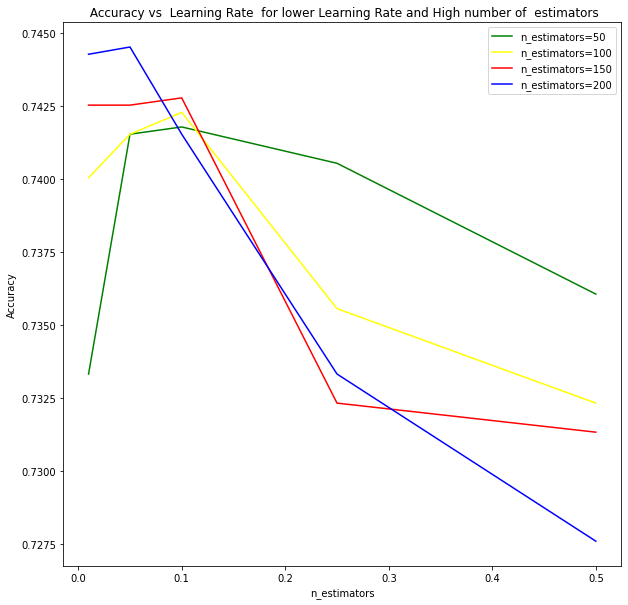

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[0],color='green', label="n_estimators=50")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[1],color='yellow', label="n_estimators=100")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[2],color='red', label="n_estimators=150")
plt.plot([0.01,0.05,0.1,0.25,0.5],lr_final[3],color='blue', label="n_estimators=200")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title(" Accuracy vs  Learning Rate  for lower Learning Rate and High number of  estimators")
plt.legend()
plt.show()

In [ ]:
## 3. Gradient Boosting Algorithm
# Build the model
gbt = GradientBoostingClassifier(max_depth = 22, min_samples_split=800,min_samples_leaf =800, n_estimators = 900, random_state = 10)                           
model_gbt = gbt.fit(X_train, y_train)

In [ ]:
y_test_pred = gbt.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_test_pred)

0.7330845771144279